<a href="https://colab.research.google.com/github/Rishishah2003/Stock-Analysis/blob/main/LIN_Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Name: Rishi Shah
Roll no: S039
College: Mukesh Patel NMIMS
Year: 2nd Year 3rd Semester
"""

'\nName: Rishi Shah\nRoll no: S039\nCollege: Mukesh Patel NMIMS\nYear: 2nd Year 3rd Semester\n'

In [ ]:
#It is a Stock Analysis Project as it is said that 98% of all the data lies between 3rd Standard deviation so I had the 3 std deviations projected.
#these lines act as support and resistance
#The stock price can not lie below or above the brown line i.e. the 3rd standard deviation.
#So this gives stock recommendations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enter the name of the stock(NSE registered name): kpittech
[*********************100%***********************]  1 of 1 completed
Enter the number of days of which you want the stock price: 300


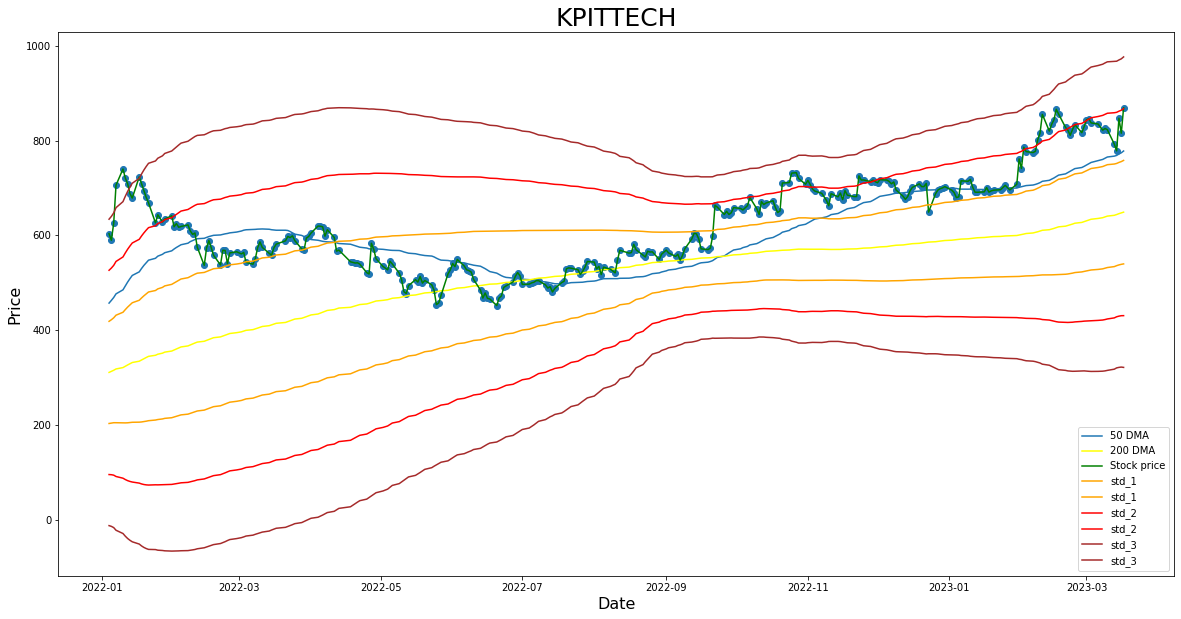

                            Open        High    Low       Close   Volume  \
Date                                                                       
2023-03-17 00:00:00+05:30  825.5  878.799988  825.5  869.200012  8212277   

                           Dividends  Stock Splits       50MA       200MA  \
Date                                                                        
2023-03-17 00:00:00+05:30        0.0           0.0  778.20147  649.211619   

                                 std1  200std1max  200std1min        std2  \
Date                                                                        
2023-03-17 00:00:00+05:30  109.155881    758.3675  540.055738  218.311763   

                           200std2max  200std2min        std3  200std3max  \
Date                                                                        
2023-03-17 00:00:00+05:30  867.523381  430.899856  327.467644  976.679263   

                           200std3min  
Date                               

In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
name= input("Enter the name of the stock(NSE registered name): ")
name= name.upper()
name= name.replace(" ","")
n= name+'.NS'
yf.download(n)
stock= yf.Ticker(n)
time=(input("Enter the number of days of which you want the stock price: "))
timed= time+'d'
hist= stock.history(period=timed,)
df= hist['Close']
mean=0
totalmean= 0
time= int(time)
time= (time+200)
timemean= str(time)
timemean= timemean+'d'
histmean= stock.history(period=timemean)
histmean['50MA']= histmean['Close'].rolling(50).mean()
histmean['200MA']= histmean['Close'].rolling(200).mean()
histmean['std1']= histmean['Close'].rolling(200).std()
histmean['200std1max']=histmean['200MA']+histmean['std1']
histmean['200std1min']=histmean['200MA']-histmean['std1']
histmean['std2']= 2*histmean['std1']
histmean['200std2max']=histmean['200MA']+histmean['std2']
histmean['200std2min']=histmean['200MA']-histmean['std2']
histmean['std3']= 3*histmean['std1']
histmean['200std3max']=histmean['200MA']+histmean['std3']
histmean['200std3min']=histmean['200MA']-histmean['std3']
t=time-200
h= histmean.tail(t)
plt.figure(figsize=(20,10))
plt.plot(h['50MA'])
plt.plot(h['200MA'], color='yellow')
plt.plot(hist['Close'], color='green')
plt.plot(h['200std1max'], color='orange')
plt.plot(h['200std1min'], color='orange')
plt.plot(h['200std2max'], color='red')
plt.plot(h['200std2min'], color='red')
plt.plot(h['200std3max'], color='brown')
plt.plot(h['200std3min'], color='brown')
plt.scatter(x=hist.index, y=hist['Close'])
plt.title(name,fontsize=25)
plt.xlabel("Date",fontsize=16)
plt.ylabel("Price",fontsize=16)
plt.legend(['50 DMA','200 DMA','Stock price','std_1','std_1','std_2','std_2','std_3','std_3'])
plt.show()
print(histmean.tail(1))

In [ ]:
#This gives us the pattern of the sales and profit year on year

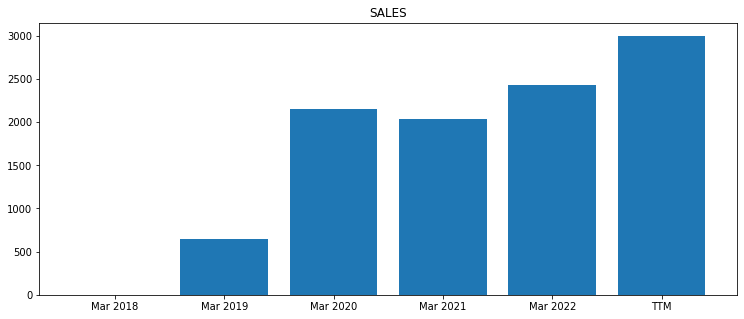

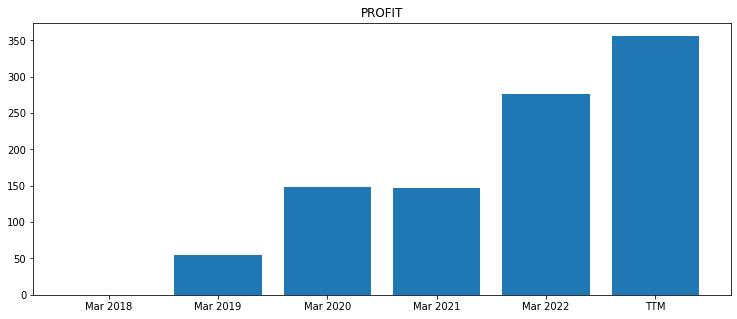

In [ ]:
import numpy as np
import requests
from bs4 import BeautifulSoup
s=[]
p=[]
url='https://www.screener.in/company/'+name+'/consolidated/'
table= pd.read_html(url,skiprows=0)[1]
t=table.T
t.columns= t.iloc[0]
t.drop(t.index[0],inplace= True)
t.reset_index(drop=True)
t.columns= t.columns.str.replace(r'\xa0\+','', regex=True)
x= t['Sales'].astype(float)
for i in x:
  s.append(i)
sales= np.array(s)
y= t['Net Profit'].astype(float)
for i in y:
  p.append(i)
profit= np.array(p)
years= t.index
years
plt.figure(figsize=(12.5,5))
plt.bar(years,sales)
plt.title('SALES')
plt.show()
print()
plt.figure(figsize=(12.5,5))
plt.bar(years, profit)
plt.title('PROFIT')
plt.show()

In [ ]:
#This shows the borrowing pattern

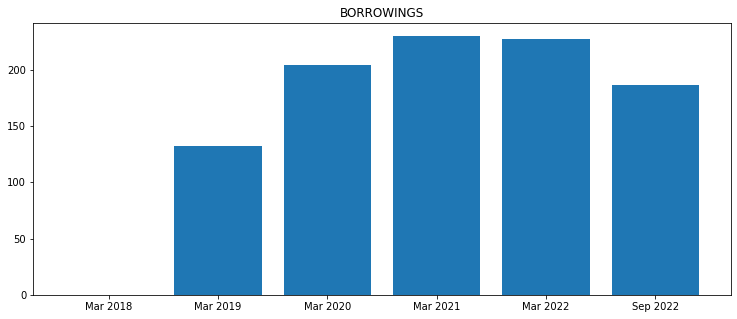

In [ ]:
import numpy as np
import requests
from bs4 import BeautifulSoup
b=[]
url='https://www.screener.in/company/'+name+'/consolidated/'
table= pd.read_html(url,skiprows=0)[6]
t=table.T
t.columns= t.iloc[0]
t.drop(t.index[0],inplace= True)
t.reset_index(drop=True)
t.columns= t.columns.str.replace(r'\xa0\+','', regex=True)
xyears=t.index
xyears=np.array(xyears)
z= t['Borrowings'].astype(float)
for i in z:
  b.append(i)
borrow= np.array(b)
borrow
plt.figure(figsize=(12.5,5))
plt.bar(xyears, borrow)
plt.title('BORROWINGS')
plt.show()

In [ ]:
#This shows you who owns what percentage of shares

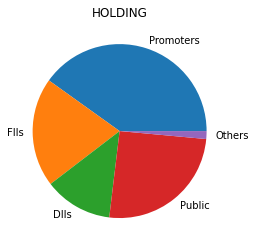

In [ ]:
hold=[]
table= pd.read_html(url,skiprows=0)[9]
t=table.T
t.columns= t.iloc[0]
t.drop(t.index[0],inplace= True)
t.reset_index(drop=True)
t.columns= t.columns.str.replace(r'\xa0\+','', regex=True)
shareholders= t.columns
h= t.tail(1).astype(float)
h= np.array(h)
for i in range(len(shareholders)):
  x= h[0][i]
  hold.append(x)
hold= np.array(hold)
plt.pie(hold, labels= shareholders)
plt.title('HOLDING')
plt.show()

In [ ]:
#This shows you the holding pattern of the FII and DII

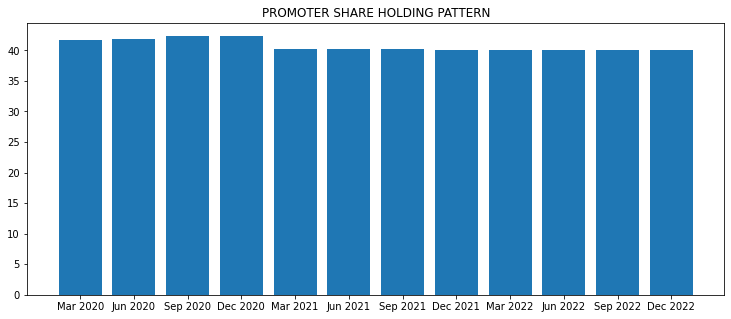

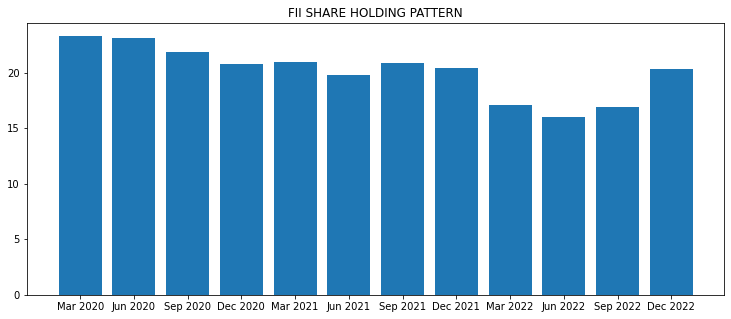

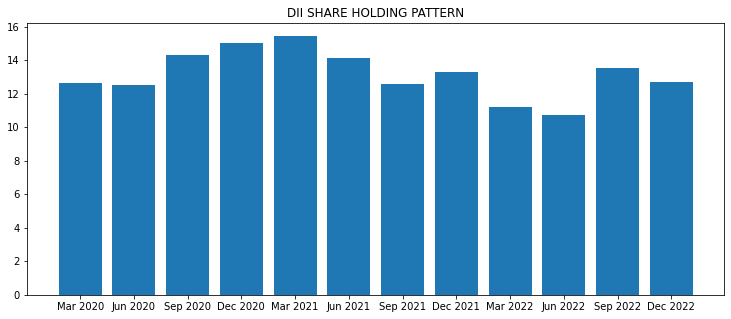

In [ ]:
promo=[]
fii=[]
dii=[]
t=table.T
t.columns= t.iloc[0]
t.drop(t.index[0],inplace= True)
t.reset_index(drop=True)
t.columns= t.columns.str.replace(r'\xa0\+','', regex=True)
x= t.Promoters.astype(float)
for i in range(len(x)):
  y= x[i]
  promo.append(y)
promo= np.array(promo)
promo
x1= t.FIIs.astype(float)
for i in range(len(x)):
  y= x1[i]
  fii.append(y)
fii= np.array(fii)
fii
x2= t.DIIs.astype(float)
for i in range(len(x)):
  y= x2[i]
  dii.append(y)
dii= np.array(dii)
dii
timeline= t.index
plt.figure(figsize=(12.5,5))
plt.bar(timeline, promo)
plt.title('PROMOTER SHARE HOLDING PATTERN')
plt.show()
print()
plt.figure(figsize=(12.5,5))
plt.bar(timeline, fii)
plt.title('FII SHARE HOLDING PATTERN')
plt.show()
print()
plt.figure(figsize=(12.5,5))
plt.bar(timeline, dii)
plt.title('DII SHARE HOLDING PATTERN')
plt.show()